# Separate counts for Chr17

## Set environment

In [1]:
suppressMessages(suppressWarnings(source("config.R")))

In [2]:
FD_WRK

[1] "/work/kk319"

In [3]:
FD_DAT=file.path(FD_WRK, "out/CombEffect_STARR/count_fragment")
Sys.glob(file.path(FD_DAT, "dat*"))

[1] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_dex_chr17.csv"  
[2] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_dex_per1.csv"   
[3] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_dmso_chr17.csv" 
[4] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_dmso_per1.csv"  
[5] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_input_chr17.csv"
[6] "/work/kk319/out/CombEffect_STARR/count_fragment/dat_cnt_input_per1.csv"

## Import separate counts of Input

In [4]:
FD_DAT = file.path(FD_WRK, "out/CombEffect_STARR/count_fragment")

In [5]:
### import input fragment count data
ctypes = c(col_character(), col_double(), col_double(), rep(col_double(), 5))
dat_cnt_input_per1  = read_csv(file.path(FD_DAT, "dat_cnt_input_per1.csv"),  col_types = ctypes)
dat_cnt_input_chr17 = read_csv(file.path(FD_DAT, "dat_cnt_input_chr17.csv"), col_types = ctypes)

### import output fragment count data
ctypes = c(col_character(), col_double(), col_double(), rep(col_double(), 4))
dat_cnt_dmso_per1  = read_csv(file.path(FD_DAT, "dat_cnt_dmso_per1.csv"),  col_types = ctypes)
dat_cnt_dmso_chr17 = read_csv(file.path(FD_DAT, "dat_cnt_dmso_chr17.csv"), col_types = ctypes)
dat_cnt_dex_per1   = read_csv(file.path(FD_DAT, "dat_cnt_dex_per1.csv"),   col_types = ctypes)
dat_cnt_dex_chr17  = read_csv(file.path(FD_DAT, "dat_cnt_dex_chr17.csv"),  col_types = ctypes)

**Check results**

In [6]:
head(dat_cnt_input_per1, 2)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5
chr17,8149040,8149982,1,NA,NA,1,NA
chr17,8149115,8150060,1,NA,NA,NA,NA


In [7]:
head(dat_cnt_input_chr17, 2)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5
chr17,10000160,10001059,1,NA,NA,NA,NA
chr17,10000167,10001087,1,NA,NA,NA,NA


In [8]:
head(dat_cnt_dmso_per1, 2)

Chrom,Start,End,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO
chr17,8149037,8150068,1,NA,NA,NA
chr17,8149037,8150069,1,NA,NA,NA


In [9]:
head(dat_cnt_dmso_chr17, 2)

Chrom,Start,End,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO
chr17,10000013,10001044,1,NA,NA,NA
chr17,10000013,10001045,1,NA,NA,NA


In [10]:
head(dat_cnt_dex_per1, 2)

Chrom,Start,End,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex
chr17,8149050,8150005,1,NA,NA,NA
chr17,8149050,8150006,1,NA,NA,NA


In [11]:
head(dat_cnt_dex_chr17, 2)

Chrom,Start,End,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex
chr17,10000156,10001172,2,NA,NA,NA
chr17,10000156,10001173,1,NA,NA,NA


## Count `#drop-out` across different  samples

**Input**

In [12]:
### combine data
lst_dat = list(
    dat_cnt_input_per1,
    dat_cnt_input_chr17
)
lst_name = c("(Input; PER1)", "(Input; Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% 
        rowwise() %>% 
        mutate(cnt_na = sum(is.na(c(Input1, Input2, Input3, Input4, Input5))))
    return(dat)
})

In [13]:
lapply(lst_dat, function(dat){table(dat$cnt_na)})

$`(Input; PER1)`

  2   3   4 
  2  41 762 

$`(Input; Chr17)`

      0       1       2       3       4 
     17     498    8943  130652 2898643 


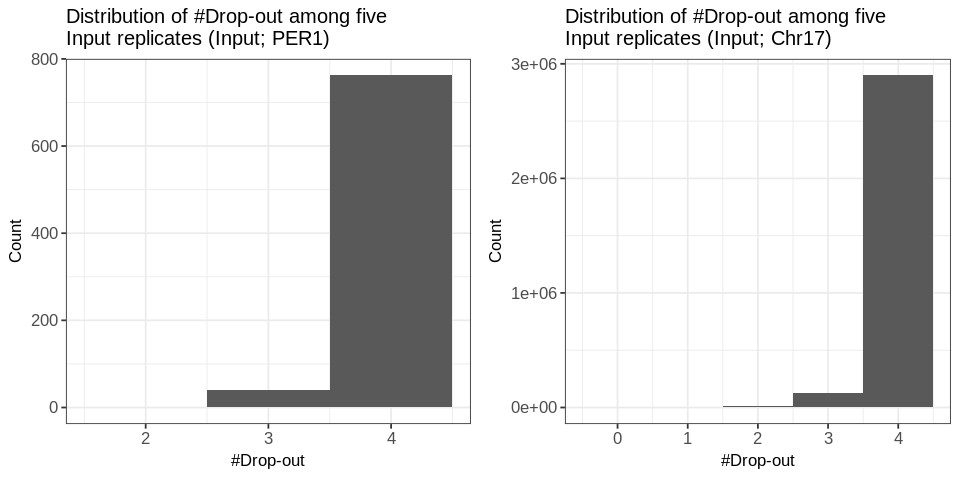

In [14]:
### generate plot
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = ggplot(dat, aes(x=cnt_na)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="#Drop-out", 
            y="Count", 
            title=paste("Distribution of #Drop-out among five\nInput replicates", idn)
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

**Output (DMSO)**

In [15]:
### combine data
lst_dat = list(
    dat_cnt_dmso_per1,
    dat_cnt_dmso_chr17
)
lst_name = c("(Output [DMSO]; PER1)", "(Output [DMSO]; Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% 
        rowwise() %>% 
        mutate(cnt_na = sum(is.na(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO))))
    return(dat)
})

In [16]:
lapply(lst_dat, function(dat){table(dat$cnt_na)})

$`(Output [DMSO]; PER1)`

   1    2    3 
  14  122 1930 

$`(Output [DMSO]; Chr17)`

      0       1       2       3 
   1448   13313  154392 3914674 


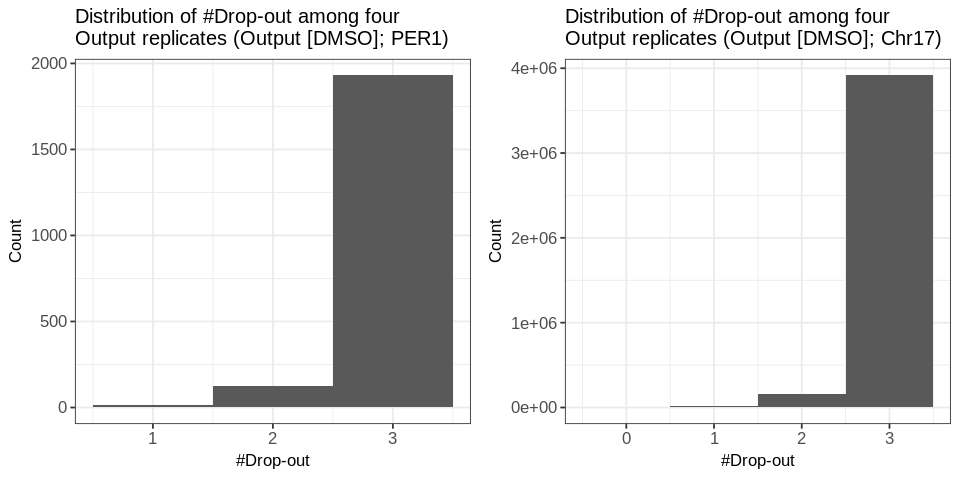

In [17]:
### generate plot
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = ggplot(dat, aes(x=cnt_na)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="#Drop-out", 
            y="Count", 
            title=paste("Distribution of #Drop-out among four\nOutput replicates", idn)
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

**Output (Dex)**

In [18]:
### combine data
lst_dat = list(
    dat_cnt_dex_per1,
    dat_cnt_dex_chr17
)
lst_name = c("(Output [Dex]; PER1)", "(Output [Dex]; Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% 
        rowwise() %>% 
        mutate(cnt_na = sum(is.na(c(TFX2_Dex, TFX3_Dex, TFX4_Dex, TFX5_Dex))))
    return(dat)
})

In [19]:
lapply(lst_dat, function(dat){table(dat$cnt_na)})

$`(Output [Dex]; PER1)`

   0    1    2    3 
  72  225  579 3951 

$`(Output [Dex]; Chr17)`

      0       1       2       3 
   5407   30831  225161 4326588 


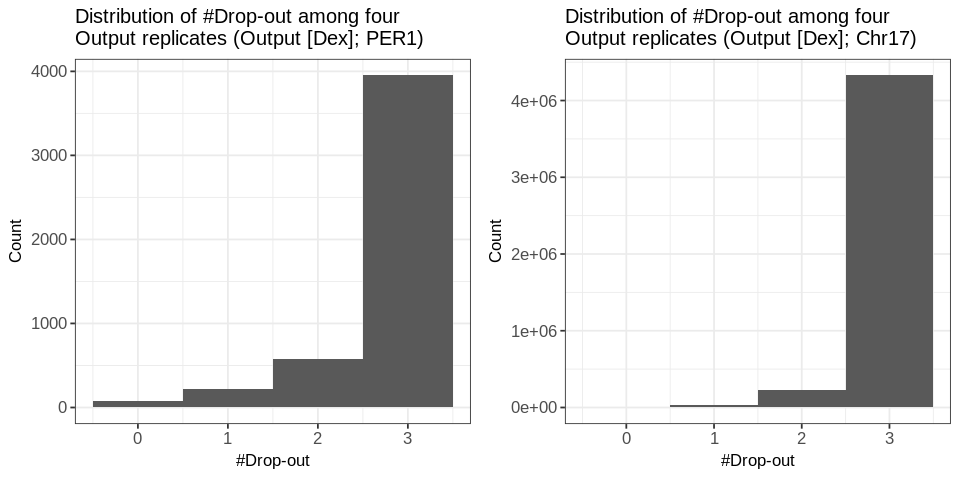

In [20]:
### generate plot
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = ggplot(dat, aes(x=cnt_na)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="#Drop-out", 
            y="Count", 
            title=paste("Distribution of #Drop-out among four\nOutput replicates", idn)
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

## Distribution of Count

**Input**

In [21]:
### combine data
lst_dat = list(
    dat_cnt_input_per1,
    dat_cnt_input_chr17
)
lst_name = c("(Input; PER1)", "(Input; Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% gather(Sample, Count, -Chrom, -Start, -End) %>% na.omit
    return(dat)
})

In [22]:
lapply(lst_dat, function(dat){table(dat$Count)})

$`(Input; PER1)`

  1   2 
838  12 

$`(Input; Chr17)`

      1       2       3       4       5 
3127723   58961    2078      89       2 


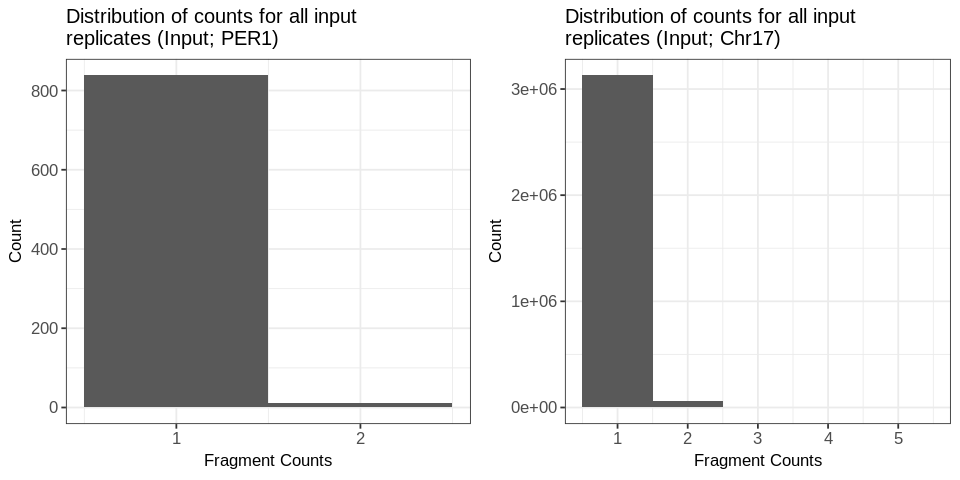

In [23]:
### generate plot
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = ggplot(dat, aes(x=Count)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="Fragment Counts", 
            y="Count",
            title=paste("Distribution of counts for all input\nreplicates", idn)
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
    return(gpt)
})

### modify the detials (x-ticks)
lst_gpt[[1]] = lst_gpt[[1]] + scale_x_continuous(breaks=c(1,2))

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

**Output (DMSO)**

In [24]:
### combine data
lst_dat = list(
    dat_cnt_dmso_per1,
    dat_cnt_dmso_chr17
)
lst_name = c("(Output [DMSO]; PER1)", "(Output [DMSO]; Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% gather(Sample, Count, -Chrom, -Start, -End) %>% na.omit
    return(dat)
})

In [25]:
lapply(lst_dat, function(dat){table(dat$Count)})

$`(Output [DMSO]; PER1)`

   1    2    3    4    5    6 
1810  306   65   24    9    2 

$`(Output [DMSO]; Chr17)`

      1       2       3       4       5       6       7       8       9      10 
3476978  590137  140648   40016   13037    4707    1836     835     380     209 
     11      12      13      14      15      16      17      18      19      20 
    126      80      50      41      25      25      17       7       8       7 
     21      22      23      24      28      30      32      35      36 
      4       4       1       2       3       1       3       1       1 


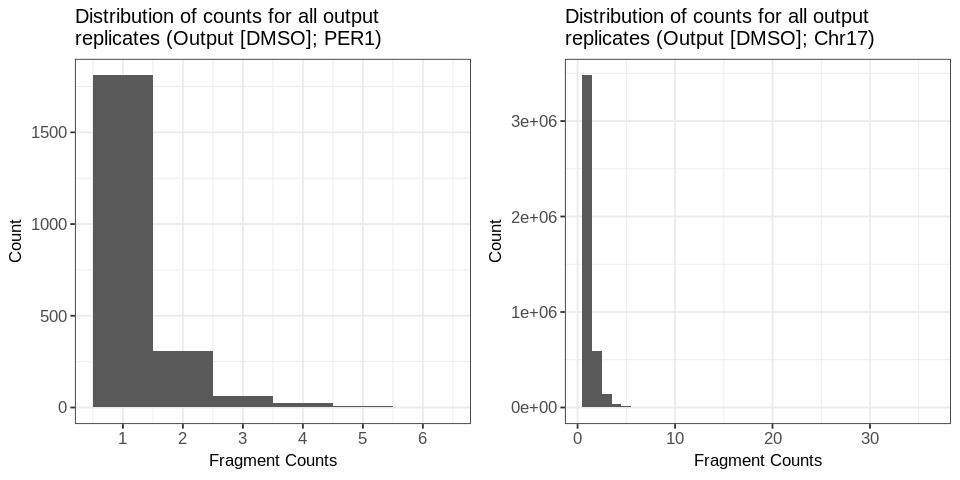

In [26]:
### generate plot
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = ggplot(dat, aes(x=Count)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="Fragment Counts", 
            y="Count",
            title=paste("Distribution of counts for all output\nreplicates", idn)
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
    return(gpt)
})

### modify the detials (x-ticks)
lst_gpt[[1]] = lst_gpt[[1]] + scale_x_continuous(breaks=c(1,2,3,4,5,6))

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

**Output (Dex)**

In [27]:
### combine data
lst_dat = list(
    dat_cnt_dex_per1,
    dat_cnt_dex_chr17
)
lst_name = c("(Output [Dex]; PER1)", "(Output [Dex]; Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% gather(Sample, Count, -Chrom, -Start, -End) %>% na.omit
    return(dat)
})

In [28]:
lapply(lst_dat, function(dat){table(dat$Count)})

$`(Output [Dex]; PER1)`

   1    2    3    4    5    6    7    8    9   10   11   12   13   19 
4549  965  301  121   65   28   13    9    9    6    3    1    1    1 

$`(Output [Dex]; Chr17)`

      1       2       3       4       5       6       7       8       9      10 
3955570  676485  170954   53687   19274    7810    3601    1611     817     489 
     11      12      13      14      15      16      17      18      19      20 
    233     166     105      69      37      31      17      14      11       7 
     21      22      23      24      25      27      28      29      31      32 
      5       5      10       5       4       3       1       2       1       1 
     34      35      36      38      41 
      2       1       1       1       1 


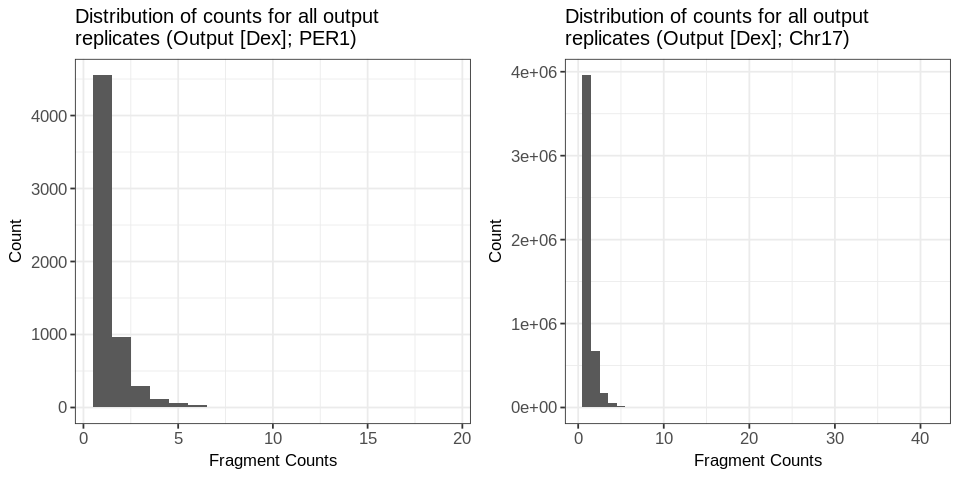

In [29]:
### generate plot
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = ggplot(dat, aes(x=Count)) + 
        geom_histogram(binwidth=1) + 
        labs(
            x="Fragment Counts", 
            y="Count",
            title=paste("Distribution of counts for all output\nreplicates", idn)
        ) +
    theme_bw() +
    theme(
        title      = element_text(size=10),
        axis.title = element_text(size=10),
        axis.text  = element_text(size=10)
    )
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

## Mean-variance relationship

In [30]:
### combine data
lst_dat = list(
    dat_cnt_dmso_per1,
    dat_cnt_dmso_chr17
)
lst_name = c("(Output [DMSO]; PER1)", "(Output [DMSO]; Chr17)")
names(lst_dat) = lst_name

### preprocess
lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% 
        rowwise() %>% 
        mutate(
            cnt_na = sum(is.na(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO))),
            Mean = mean(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO), na.rm = TRUE),
            SD   =   sd(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO), na.rm = TRUE)
        )
    return(dat)
})

In [31]:
lapply(lst_dat, function(dat){table(dat$cnt_na)})

$`(Output [DMSO]; PER1)`

   1    2    3 
  14  122 1930 

$`(Output [DMSO]; Chr17)`

      0       1       2       3 
   1448   13313  154392 3914674 


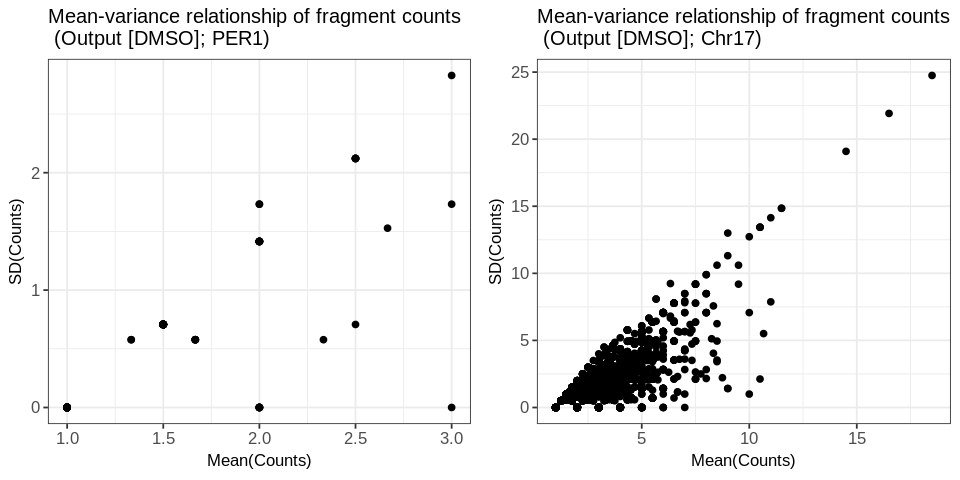

In [32]:
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = dat %>% 
        dplyr::filter(cnt_na <= 2) %>%
        ggplot(aes(x=Mean, y=SD)) +    
        geom_point() + 
        labs(
            x="Mean(Counts)", 
            y="SD(Counts)", 
            title=paste("Mean-variance relationship of fragment counts\n", idn)
        ) +
        theme_bw() +
        theme(
            title      = element_text(size=10),
            axis.title = element_text(size=10),
            axis.text  = element_text(size=10)
        )
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

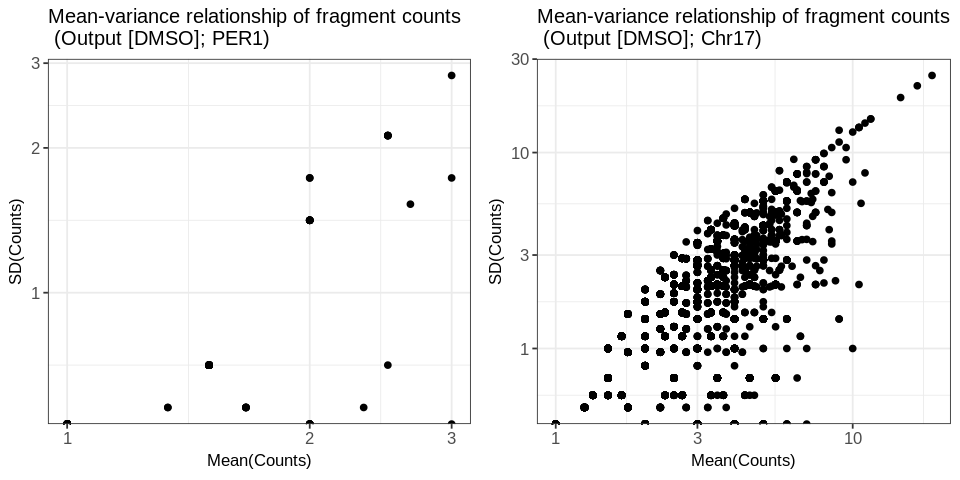

In [33]:
lst_gpt = lapply(seq_along(lst_dat), function(idx){
    ### extract correspond dataframe and name
    dat = lst_dat[[idx]]
    idn = lst_name[idx]
    
    ### create ggplot
    gpt = dat %>% 
        dplyr::filter(cnt_na <= 2) %>%
        ggplot(aes(x=Mean, y=SD)) +    
        geom_point() + 
        labs(
            x="Mean(Counts)", 
            y="SD(Counts)", 
            title=paste("Mean-variance relationship of fragment counts\n", idn)
        ) +
        theme_bw() +
        theme(
            title      = element_text(size=10),
            axis.title = element_text(size=10),
            axis.text  = element_text(size=10)
        ) +
        scale_x_log10() +
        scale_y_log10()
    return(gpt)
})

### visualize
options(repr.plot.height=4, repr.plot.width=8)
grid.arrange(grobs=lst_gpt, ncol=2)

In [34]:
lapply(lst_dat, function(dat){
    dat %>% dplyr::filter(SD==0) %>% group_by(Mean) %>% summarise(Count=n())
})

Warning message:
“Grouping rowwise data frame strips rowwise nature”Warning message:
“Grouping rowwise data frame strips rowwise nature”

Mean,Count
1,58
2,7
3,1
Mean,Count
1,86634
2,6494
3,720
4,87
5,18
6,3


In [35]:
for (dat in lst_dat){
    df1 = dat %>% dplyr::filter(cnt_na <= 2)
    df2 = df1 %>% dplyr::filter(SD==0)
    cat("#{SD==0} / #Total = ", nrow(df2), "/", nrow(df1), "=", nrow(df2) / nrow(df1), "\n")
}

#{SD==0} / #Total =  66 / 136 = 0.4852941 
#{SD==0} / #Total =  93957 / 169153 = 0.5554557 


## Create Loess fitting line

In [36]:
dat = dat_cnt_dmso_chr17
dat = dat %>% 
    rowwise() %>% 
    mutate(
        cnt_na = sum(is.na(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO))),
        Mean  = mean(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO), na.rm = TRUE),
        Var   =  var(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO), na.rm = TRUE)
    ) %>%
    mutate(
        log10mu  = log10(Mean), 
        log10var = log10(Var)
    )

In [37]:
head(dat)

Chrom,Start,End,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO,cnt_na,Mean,Var,log10mu,log10var
chr17,10000013,10001044,1,NA,NA,NA,3,1.0,NA,0.0000000,NA
chr17,10000013,10001045,1,NA,NA,NA,3,1.0,NA,0.0000000,NA
chr17,10000209,10001200,2,1,NA,NA,2,1.5,0.5,0.1760913,-0.30103
chr17,10000209,10001201,3,1,NA,NA,2,2.0,2.0,0.3010300,0.30103
chr17,10000210,10001199,1,NA,NA,NA,3,1.0,NA,0.0000000,NA
chr17,10000222,10001239,1,NA,NA,NA,3,1.0,NA,0.0000000,NA


**Distribution of Drop-out values**
```
> table(dat$cnt_na)
0      1      2      3 
1448   13313  154392 3914674 
```

In [38]:
table(dat$cnt_na)


      0       1       2       3 
   1448   13313  154392 3914674 

**Smoothing**

Remove `NA` values and `Inf` values

In [39]:
df1 = dat %>% dplyr::filter(cnt_na==0) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df2 = dat %>% dplyr::filter(cnt_na<=1) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df3 = dat %>% dplyr::filter(cnt_na<=2) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))
df4 = dat %>% dplyr::filter(cnt_na<=3) %>% dplyr::select(log10mu,log10var) %>% na.omit %>% filter_all(all_vars(!is.infinite(.)))

In [40]:
cat("\n",
    "#{Drop-out==0} =", nrow(df1), "\n",
    "#{Drop-out<=1} =", nrow(df2), "\n",
    "#{Drop-out<=2} =", nrow(df3), "\n",
    "#{Drop-out<=3} =", nrow(df4), "\n")


 #{Drop-out==0} = 1313 
 #{Drop-out<=1} = 10730 
 #{Drop-out<=2} = 75196 
 #{Drop-out<=3} = 75196 


Testing Span of Loess
```
df = df1
for (x in c(0.1, 0.2, 0.4, 0.45, 0.5)){
    print(x)
    loessModx = loess(log10sd ~ log10mu, data=df, span=x)
    cat("+++++++++++++++++++++++++++\n")
}
```
Results: the warning message decrease until it reaches to 45% for df1, about 70% for df4

In [69]:
qs = quantile(df1$log10mu, probs = seq(0, 1, by=0.25))
qs

0%        25%        50%        75%       100% 
0.09691001 0.17609126 0.30103000 0.39794001 1.04139269

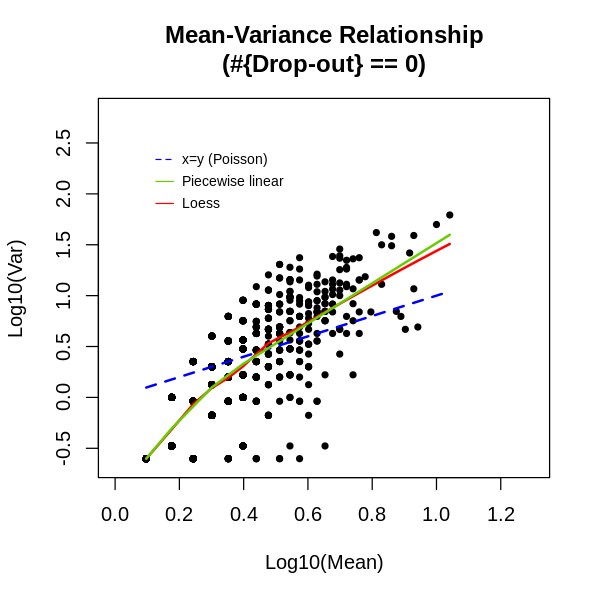

In [53]:
### arrange data and set knots for piecewise linear regression
df = df1 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     main="Mean-Variance Relationship\n(#{Drop-out} == 0)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  1.3),
     ylim=c(-0.65, 2.8))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.1, 2.5, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

In [68]:
qs = quantile(df2$log10mu, probs = seq(0, 1, by=0.25))
qs

0%        25%        50%        75%       100% 
0.09691001 0.12493874 0.22184875 0.36797679 1.04139269

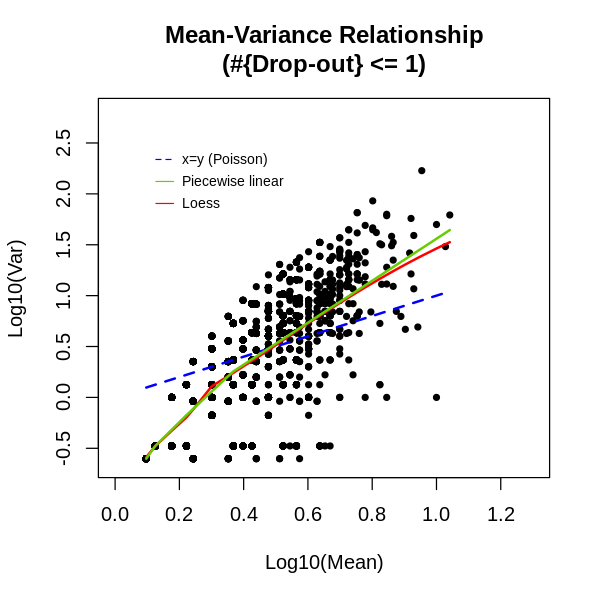

In [54]:
### arrange data and set knots for piecewise linear regression
df = df2 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])

### Loess
span = 0.6
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     main="Mean-Variance Relationship\n(#{Drop-out} <= 1)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  1.3),
     ylim=c(-0.65, 2.8))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.1, 2.5, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

In [67]:
qs = quantile(df3$log10mu, probs = seq(0, 1, by=0.25))
qs

0%        25%        50%        75%       100% 
0.09691001 0.17609126 0.17609126 0.30103000 1.26717173

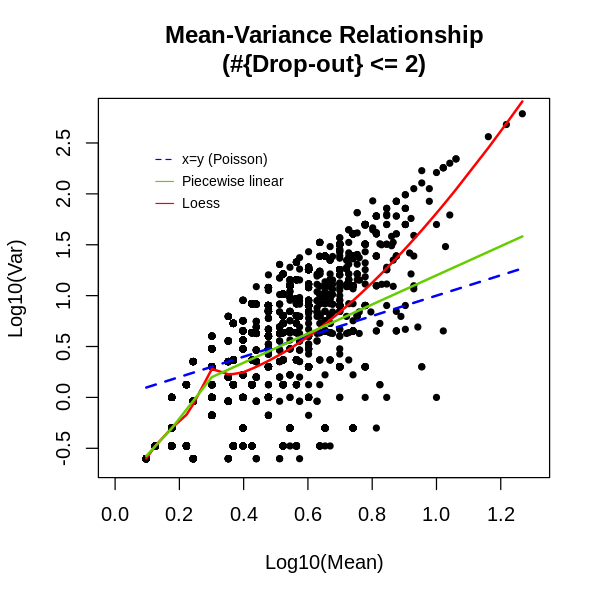

In [70]:
### arrange data and set knots for piecewise linear regression
df = df3 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
#pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
pieceMod = lm(log10var ~ log10mu + q1 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q3")])

### Loess
span = 0.7
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     main="Mean-Variance Relationship\n(#{Drop-out} <= 2)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  1.3),
     ylim=c(-0.65, 2.8))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.1, 2.5, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

In [66]:
qs = quantile(df4$log10mu, probs = seq(0, 1, by=0.25))
qs

0%        25%        50%        75%       100% 
0.09691001 0.17609126 0.17609126 0.30103000 1.26717173

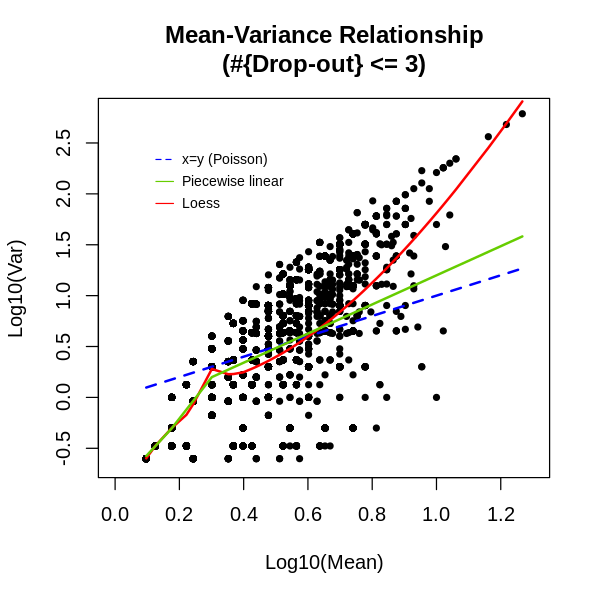

In [71]:
### arrange data and set knots for piecewise linear regression
df = df4 %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
#pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
pieceMod = lm(log10var ~ log10mu + q1 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q3")])

### Loess
span = 0.7
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     main="Mean-Variance Relationship\n(#{Drop-out} <= 3)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)",
     xlim=c( 0.0,  1.3),
     ylim=c(-0.65, 2.8))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(0.1, 2.5, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)